In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import scipy.optimize as opt
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb

#plt.style.use('ggplot')

my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))

# Сначала через функцию из статьи

In [9]:
def andersonpvalue(T):
    star = T * (1 + 0.75/n + 2.25/n /n)
    #print(star)
    return { #так работает аналог switch - case в пайтоне
               star < 0.2:  1 - m.exp(-13.436 + 101.14 * star - 223.73 * star**2),
        0.2 <= star < 0.34: 1 - m.exp(-8.318 + 42.796 * star - 59.938 * star**2),
       0.34 <= star < 0.6:  m.exp(0.9177 - 4.279 * star - 1.38* star**2),
        0.6 <= star:        m.exp(1.2937 - 5.709 * star + 0.0186 * star**2)
    }[True]


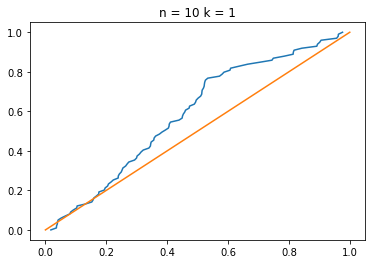

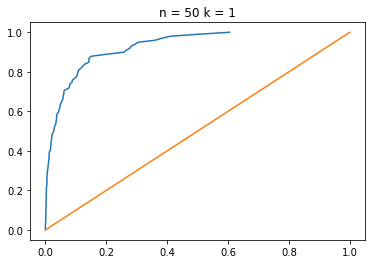

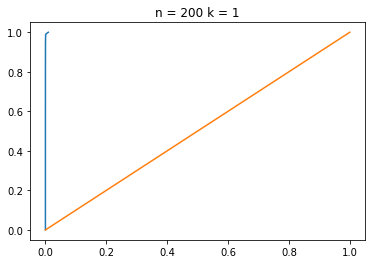

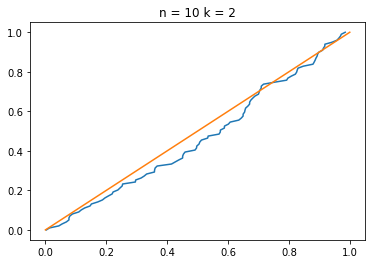

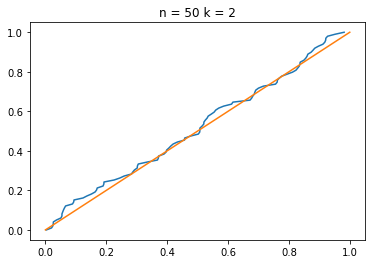

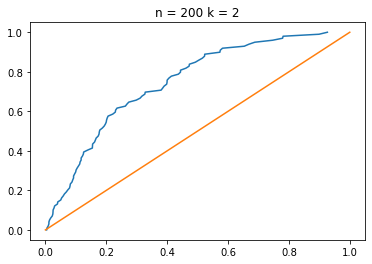

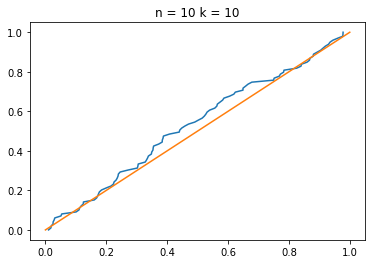

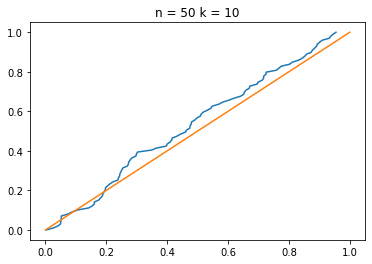

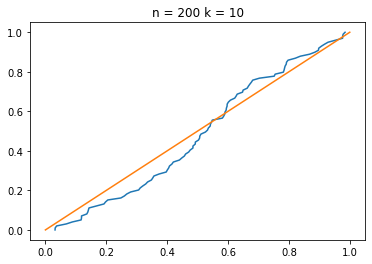

In [36]:
m0 = 100

for k in [1, 2, 10]:
    for n in [10, 50, 200]:
        ps = []; 
        
        for j in range(m0):
            xs = []
            for i in range(n): 
                xs.append((stat.uniform().rvs(k).sum() - k * 0.5) *  2 * m.sqrt(3/k)) #1 2
            ps.append(andersonpvalue(stat.anderson(xs).statistic))#2
        #print(sorted(ps))     
        plt.plot(sorted(ps), np.linspace(0, 1, m0))
        plt.plot(np.linspace(0, 1, m0), np.linspace(0, 1, m0))
        #sb.distplot(xs)
        plt.title('n = ' + str(n) + ' k = '+ str(k))
        plt.show()

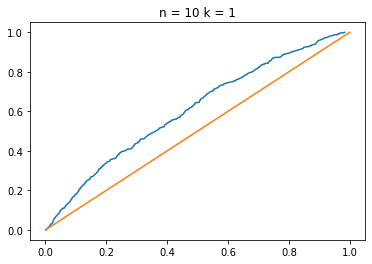

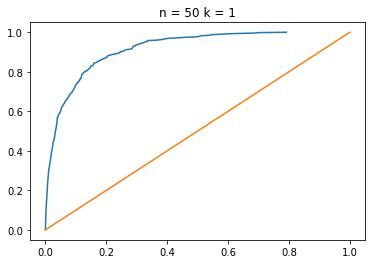

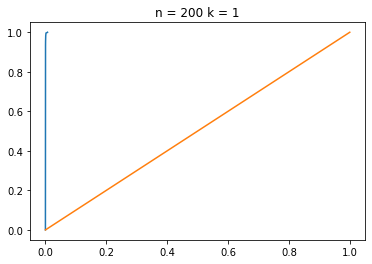

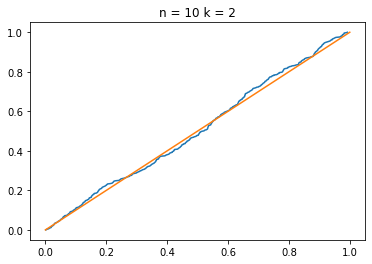

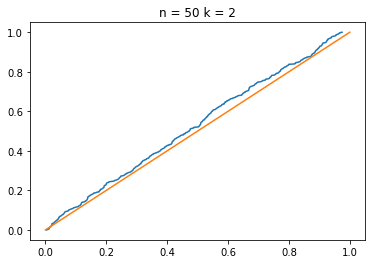

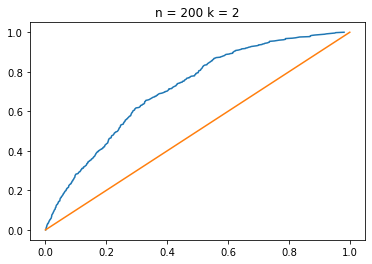

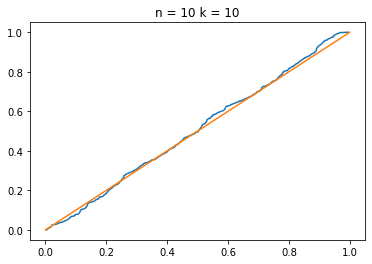

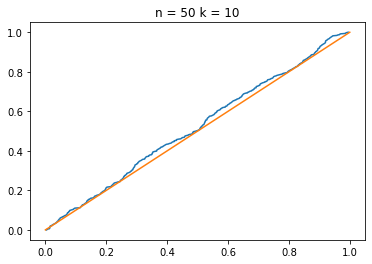

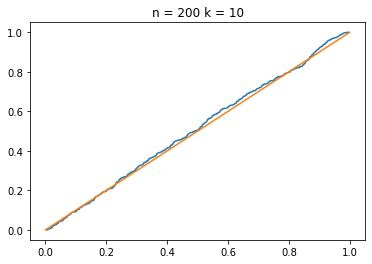

In [37]:
m0 = 500

for k in [1, 2, 10]:
    for n in [10, 50, 200]:
        ps = []; 
        
        for j in range(m0):
            xs = []
            for i in range(n): 
                xs.append((stat.uniform().rvs(k).sum() - k * 0.5) *  2 * m.sqrt(3/k)) #1 2
            ps.append(andersonpvalue(stat.anderson(xs).statistic))#2
            #print(stat.anderson(xs).statistic)
        #print(sorted(ps))     
        plt.plot(sorted(ps), np.linspace(0, 1, m0))
        plt.plot(np.linspace(0, 1, m0), np.linspace(0, 1, m0))
        #sb.distplot(xs)
        plt.title('n = ' + str(n) + ' k = '+ str(k))
        plt.show()

### Вывод
Как и для критерия Колмогорова:

1)Чем больше к, тем сложнее различить сумму равномерных от ее приближения по ЦПТ

2)При n = 10 различить что-либо уже сложно

Различия в большинстве случаев (может быть во всех, но "на глазок" это не заметно) сильнее у критерия Андерсона-Дарлинга

### Теперь через таблицу значений
## Пока что не работает

In [2]:
#f = open('DistFunc_values_AD.txt', 'r')
with open('DistFunc_values_AD.txt') as f:
    flat_list = [float(word) for line in f for word in line.split()]


In [3]:
pvaluetable = {}
    
for i in range(len(flat_list) // 2):
    pvaluetable[flat_list[2 * i]] = flat_list[2 * i + 1] 

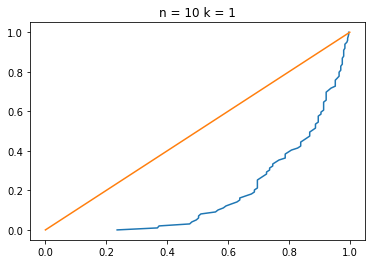

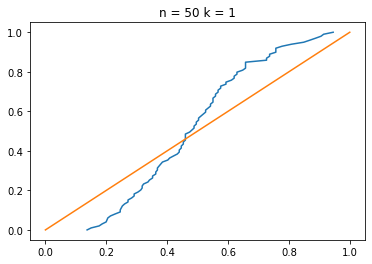

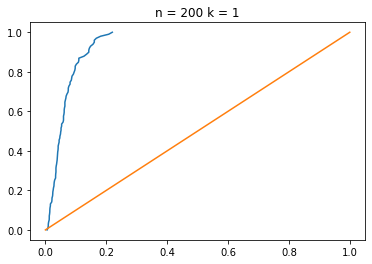

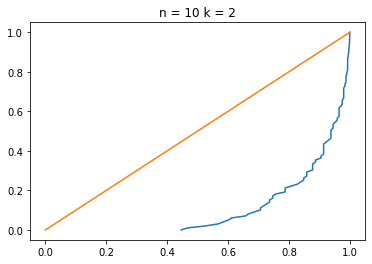

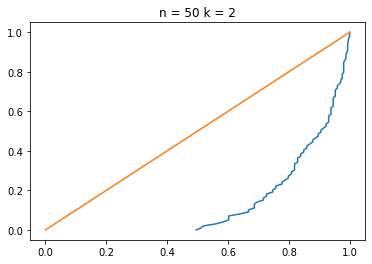

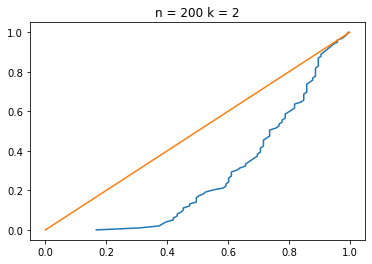

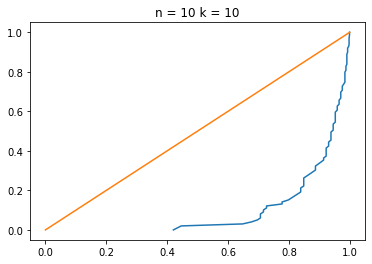

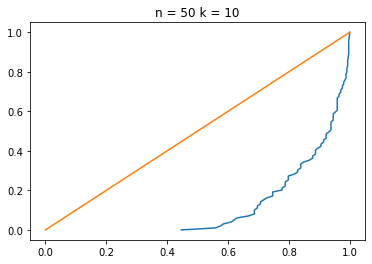

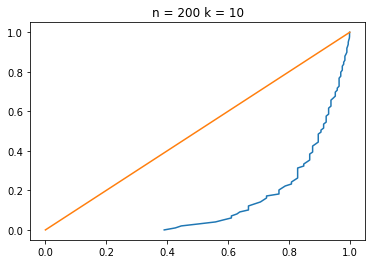

In [6]:
m0 = 100

for k in [1, 2, 10]:
    for n in [10, 50, 200]:
        ps = []; 
        
        for j in range(m0):
            xs = []
            for i in range(n): 
                xs.append((stat.uniform().rvs(k).sum() - k * 0.5) *  2 * m.sqrt(3/k)) #1 2
            ps.append(1 - pvaluetable[round(stat.anderson(xs).statistic, 2)])#2
        #print(sorted(ps))     
        plt.plot(sorted(ps), np.linspace(0, 1, m0))
        plt.plot(np.linspace(0, 1, m0), np.linspace(0, 1, m0))
        #sb.distplot(xs)
        plt.title('n = ' + str(n) + ' k = '+ str(k))
        plt.show()

###### далее идут разного рода проверки: все решения задач - выше

In [7]:
print(pvaluetable[round(stat.anderson(xs).statistic, 2)])
stat.anderson(xs).statistic

0.007101181


0.19102447206577722

In [4]:
pvaluetable


{0.1: 2.8074e-05,
 0.11: 8.226165e-05,
 0.12: 0.0002007745,
 0.13: 0.0004258761,
 0.14: 0.0008092417,
 0.15: 0.001408409,
 0.16: 0.002282713,
 0.17: 0.003489447,
 0.18: 0.005080716,
 0.19: 0.007101181,
 0.2: 0.009586709,
 0.21: 0.0125638,
 0.22: 0.01604966,
 0.23: 0.02005269,
 0.24: 0.02457333,
 0.25: 0.029605,
 0.26: 0.0351352,
 0.27: 0.04114651,
 0.28: 0.04761762,
 0.29: 0.05452424,
 0.3: 0.06183989,
 0.31: 0.06953666,
 0.32: 0.07758578,
 0.33: 0.08595816,
 0.34: 0.0946248,
 0.35: 0.1035571,
 0.36: 0.1127273,
 0.37: 0.1221083,
 0.38: 0.1316742,
 0.39: 0.1414005,
 0.4: 0.1512635,
 0.41: 0.1612412,
 0.42: 0.1713128,
 0.43: 0.1814586,
 0.44: 0.1916604,
 0.45: 0.2019014,
 0.46: 0.2121657,
 0.47: 0.2224388,
 0.48: 0.2327073,
 0.49: 0.2429589,
 0.5: 0.2531823,
 0.51: 0.263367,
 0.52: 0.2735038,
 0.53: 0.283584,
 0.54: 0.2935999,
 0.55: 0.3035445,
 0.56: 0.3134114,
 0.57: 0.3231951,
 0.58: 0.3328904,
 0.59: 0.3424929,
 0.6: 0.3519987,
 0.61: 0.3614042,
 0.62: 0.3707065,
 0.63: 0.3799029,
 0

In [16]:
x_axis = np.linspace(0.1, 10, 1000)

for elem in x_axis:
    print(round(elem, 2), ':', 1 - andersonpvalue(round(elem, 2)))

0.1 : 0.003934909300836287
0.11 : 0.006764721297562559
0.12 : 0.011116906044540298
0.13 : 0.017463721868817617
0.14 : 0.02622457878074591
0.15 : 0.03764428743140835
0.16 : 0.05165453836518119
0.17 : 0.06775427972131587
0.18 : 0.08495399864708564
0.19 : 0.10182390817805875
0.2 : 0.11741655121171402
0.21 : 0.14085017001883127
0.22 : 0.16693199179820917
0.23 : 0.1954681125140354
0.24 : 0.22613428258323598
0.25 : 0.2584705339949953
0.26 : 0.29188368248535157
0.27 : 0.32565873965215253
0.28 : 0.3589796278202907
0.29 : 0.3909588174598202
0.3 : 0.4206746732615001
0.31 : 0.4472144874388342
0.32 : 0.46972049098154245
0.33 : 0.48743565356863006
0.34 : 0.5051211426260014
0.35 : 0.5304543587299964
0.36 : 0.5546146298395883
0.37 : 0.5776492187019202
0.38 : 0.5996038647001316
0.39 : 0.6205228130882898
0.4 : 0.6404488447334291
0.41 : 0.6594233062900293
0.42 : 0.6774861407353353
0.43 : 0.694675918196983
0.44 : 0.7110298670074561
0.45 : 0.7265839049229245
0.46 : 0.7413726704470307
0.47 : 0.755429554203

In [17]:
#аблосютная погрешность
for elem in x_axis:
    print(round(elem, 2), ':', 1 - andersonpvalue(round(elem, 2)) - pvaluetable[round(elem, 2)])

0.1 : 0.003906835300836286
0.11 : 0.006682459647562559
0.12 : 0.010916131544540297
0.13 : 0.017037845768817617
0.14 : 0.02541533708074591
0.15 : 0.03623587843140835
0.16 : 0.04937182536518119
0.17 : 0.06426483272131586
0.18 : 0.07987328264708564
0.19 : 0.09472272717805875
0.2 : 0.10782984221171402
0.21 : 0.12828637001883125
0.22 : 0.15088233179820917
0.23 : 0.17541542251403539
0.24 : 0.20156095258323597
0.25 : 0.22886553399499532
0.26 : 0.2567484824853516
0.27 : 0.2845122296521525
0.28 : 0.31136200782029066
0.29 : 0.3364345774598202
0.3 : 0.3588347832615001
0.31 : 0.37767782743883416
0.32 : 0.39213471098154246
0.33 : 0.40147749356863005
0.34 : 0.4104963426260014
0.35 : 0.42689725872999634
0.36 : 0.44188732983958834
0.37 : 0.4555409187019202
0.38 : 0.46792966470013164
0.39 : 0.4791223130882898
0.4 : 0.4891853447334291
0.41 : 0.49818210629002935
0.42 : 0.5061733407353353
0.43 : 0.513217318196983
0.44 : 0.519369467007456
0.45 : 0.5246825049229245
0.46 : 0.5292069704470307
0.47 : 0.5329907

9.99 : 6.900000000031881e-06
10.0 : 6.799999999973494e-06


In [19]:
for elem in x_axis:
    print(round(elem, 2), ':', \
          (1 - andersonpvalue(round(elem, 2)) - pvaluetable[round(elem, 2)]) / andersonpvalue(round(elem, 2)))

0.1 : 0.003922269073895541
0.11 : 0.006727972506466468
0.12 : 0.011038849396116757
0.13 : 0.017340678556138592
0.14 : 0.026099793162702372
0.15 : 0.037653310473621415
0.16 : 0.05206101295626055
0.17 : 0.06893550844310085
0.18 : 0.08728881665948088
0.19 : 0.10546119857845987
0.2 : 0.12217523720817047
0.21 : 0.14931780877107675
0.22 : 0.18111646385736796
0.23 : 0.21803414537387816
0.24 : 0.26045985504573743
0.25 : 0.30863983764260916
0.26 : 0.3625795312647069
0.27 : 0.4219113472389213
0.28 : 0.4857287245981641
0.29 : 0.5524003747277383
0.3 : 0.619401166666883
0.31 : 0.6832267106440204
0.32 : 0.7394868259333275
0.33 : 0.7832723761686496
0.34 : 0.8294885435280858
0.35 : 0.9091709542342805
0.36 : 0.992146036769094
0.37 : 1.0785842926626814
0.38 : 1.1686667863307056
0.39 : 1.2625852873726586
0.4 : 1.360544494345311
0.41 : 1.462760416349196
0.42 : 1.5694622919133345
0.43 : 1.6808936758813884
0.44 : 1.7973119284990497
0.45 : 1.9189890952652855
0.46 : 2.0462144173307264
0.47 : 2.179293383003065

8.86 : 2.790530861155954e+16
8.87 : 2.9079391998297544e+16
8.88 : 3.02977536205475e+16
8.89 : 3.156169160736861e+16
8.9 : 3.287251203749866e+16
8.91 : 3.42315258515696e+16
8.92 : 3.5737957611117824e+16
8.93 : 3.72027214802572e+16
8.94 : 3.871990476317827e+16
8.95 : 4.029081581182439e+16
8.96 : 4.203824500920971e+16
8.97 : 4.372720220754478e+16
8.98 : 4.5474066746681256e+16
8.99 : 4.742290771226849e+16
9.0 : 4.944790416905242e+16
9.01 : 5.139239882014752e+16
9.02 : 5.356828522053791e+16
9.03 : 5.565007776762847e+16
9.04 : 5.798494634528581e+16
9.05 : 6.040749167134401e+16
9.06 : 6.292025900347735e+16
9.07 : 6.552580686235028e+16
9.08 : 6.822670073717881e+16
9.09 : 7.1025506057418184e+16
9.1 : 7.39247803691549e+16
9.11 : 7.692706464827813e+16
9.12 : 8.003487368355656e+16
9.13 : 8.325068544770237e+16
9.14 : 8.657692937870421e+16
9.15 : 9.001597348195954e+16
9.16 : 9.392724798453293e+16
9.17 : 9.761844586047506e+16
9.18 : 1.0143012326245573e+17
9.19 : 1.0578408489154224e+17
9.2 : 1.0986588

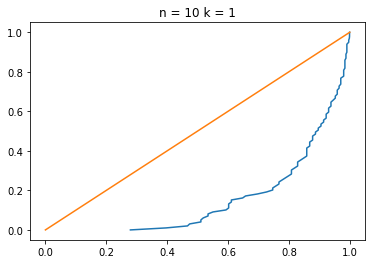

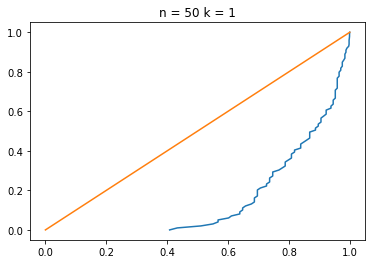

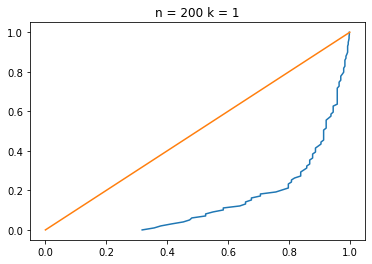

In [85]:
m0 = 100

for k in [1]:
    for n in [10, 50, 200]:
        ps = []; 
        
        for j in range(m0):
            xs = []
            for i in range(n): 
                xs.append(stat.norm().rvs(1)[0]) #1 2
            ps.append(1 - pvaluetable[round(stat.anderson(xs).statistic, 2)])#2
        #print(sorted(ps))     
        plt.plot(sorted(ps), np.linspace(0, 1, m0))
        plt.plot(np.linspace(0, 1, m0), np.linspace(0, 1, m0))
        #sb.distplot(xs)
        plt.title('n = ' + str(n) + ' k = '+ str(k))
        plt.show()

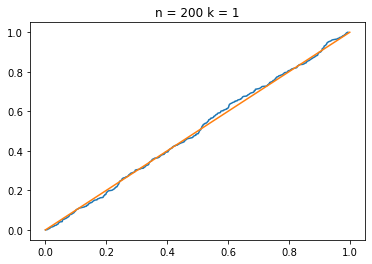

In [82]:
m0 = 500

for k in [1]:
    for n in [200]:
        ps = []; 
        
        for j in range(m0):
            xs = []
            for i in range(n): 
                xs.append(stat.norm().rvs()) #1 2
            ps.append(andersonpvalue(stat.anderson(xs).statistic))#2
        #print(sorted(ps))     
        plt.plot(sorted(ps), np.linspace(0, 1, m0))
        plt.plot(np.linspace(0, 1, m0), np.linspace(0, 1, m0))
        #sb.distplot(xs)
        plt.title('n = ' + str(n) + ' k = '+ str(k))
        plt.show()

Пока что второй метод не работает((99((